In [14]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import ifft

def Vo(w,R):
    return (-w*L*1j)/((-w*L*1j) - R + R*C*L*w**2)
def Zi(w):
    return L*w/(1-(L*C*w**2))
def phaseVo(Zr,w):
    return np.arctan(Zr/Zi(w))
def sawtooth(t, period, amp):
    slope = 2*amp/period
    if 0 < t <= period:    
        return slope*t - amp
    elif t == 0:
        return amp
    else:
        return sawtooth(t-period, period, amp)
def wmap(t,period):
    if 0<= t < period:    
        return np.e**((np.pi/2)*(t/period))
    elif abs(t-period)<1e-3:
        return 0
    else:
        return wmap(t-period, period)

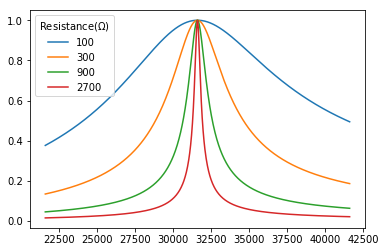

In [9]:
#Fig 1
R = [100,300,900,2700]
C = 1e-6
L = 1e-3
wr = 1/(L*C)**.5 #resonance freq

w = np.linspace(wr-1e4,wr+1e4,1000)
v0 = []
plt.figure('|Vo| vs omega')
for r in R:
    for wi in w:
        vi = abs(Vo(wi,r))
        v0.append(vi)
    plt.plot(w,v0, label = r)
    v0.clear()
plt.legend(title = 'Resistance($\Omega$)', loc = 'best')

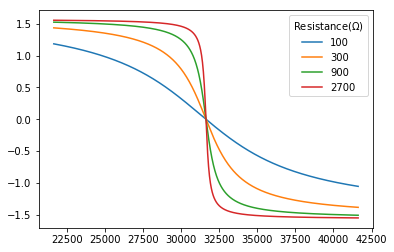

In [10]:
#Fig 2
plt.figure('phase(Vo) vs omega')
Zr = [100,300,900,2700]
for r in Zr:
    for wi in w:
        phase = phaseVo(r,wi)
        v0.append(phase)
    plt.plot(w,v0, label = r)
    v0.clear()
plt.legend(title = 'Resistance($\Omega$)', loc = 'best')

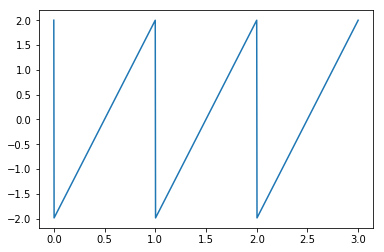

In [13]:
#Fig 3    
plt.figure('Sawtooth Vin')
t = np.linspace(0,3,1000)
period = 1
amp = 2
Vin = []
for ti in t:
    #v = sawtooth(ti, period, amp)
    v = sawtooth(ti, period, amp)
    Vin.append(v)
plt.plot(t,Vin)

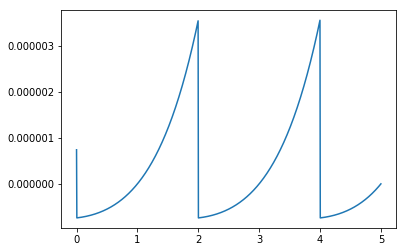

In [15]:
plt.figure('Sawtooth Vout')
t = np.linspace(0,5,1000)
period = 2
amp = 2
f = 1
Vout = []
for ti in t:
    v = sawtooth(ti, period, amp)*abs(Vo(f*wmap(ti,period), 2700))
    Vout.append(v)
np.array(Vout)
plt.plot(t,Vout)